# Notebook 1: DBSCAN Example

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import seaborn as sns
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

from epic_clustering.scoring import weighted_v_score

all_colors = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
              'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
              'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
all_colors = all_colors*10

In [2]:
import scipy.linalg as la
import numpy as np

In [28]:
%%time
offdi = la.circulant([0,1,0,0,1])
I = np.eye(5)

import matplotlib.pyplot as plt
A = np.kron(offdi,I) + np.kron(I,offdi)

CPU times: user 169 µs, sys: 248 µs, total: 417 µs
Wall time: 378 µs


In [17]:
hits = np.array([[0, 0, 1, 1, 0], [0, 1, 1, 1, 0], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], [0, 0, 0, 1, 1]])

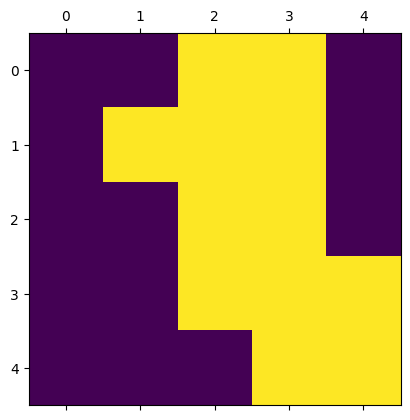

In [18]:
plt.matshow(hits)
plt.show()

In [5]:
import pandas as pd
import itertools

In [19]:
all_combos = np.array(list(itertools.product(range(len(hits)), range(len(hits))))).T

In [20]:
all_combos.shape

(2, 25)

In [21]:
label_df = pd.DataFrame({"row": all_combos[0], "col": all_combos[1], "label": np.arange(all_combos.shape[1])})

In [23]:
nonzero_entries = np.where(hits)

In [24]:
hits_df = pd.DataFrame({"row": nonzero_entries[0], "col": nonzero_entries[1]})

In [25]:
hits_df = hits_df.merge(label_df, on=["row", "col"])

In [26]:
hits_df

,row,col,label
0,0,2,2
1,0,3,3
2,1,1,6
3,1,2,7
4,1,3,8
5,2,2,12
6,2,3,13
7,3,2,17
8,3,3,18
9,3,4,19


In [31]:
hits_vector = np.zeros(5**2)
hits_vector[hits_df.label.values] = np.ones(len(hits_df))

In [32]:
adjacency = hits_vector * A

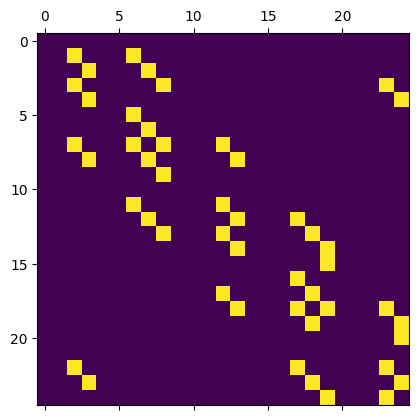

In [33]:
plt.matshow(adjacency)

In [34]:
from scipy.sparse.csgraph import connected_components

In [67]:
A

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

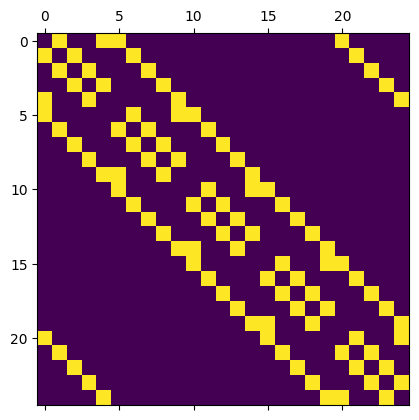

In [29]:
plt.matshow(A)
plt.show()

In [35]:
%%time
offdi = la.circulant([0,1,0,0,1])
I = np.eye(100)

import matplotlib.pyplot as plt
A = np.kron(offdi,I) + np.kron(I,offdi)

CPU times: user 2.63 ms, sys: 0 ns, total: 2.63 ms
Wall time: 2.24 ms


In [36]:
A.shape

(500, 500)

In [37]:
hits = np.random.randint(0, 2, (100, 100))

In [38]:
all_combos = np.array(list(itertools.product(range(len(hits)), range(len(hits))))).T

In [39]:
all_combos.shape

(2, 10000)

In [55]:
label_df = pd.DataFrame({"row": all_combos[0], "col": all_combos[1], "label": np.arange(all_combos.shape[1])})

In [56]:
nonzero_entries = np.where(hits)

In [57]:
hits_df = pd.DataFrame({"row": nonzero_entries[0], "col": nonzero_entries[1]})

In [58]:
hits_df = hits_df.merge(label_df, on=["row", "col"])

In [59]:
hits_df

,row,col,label
0,0,0,0
1,0,1,1
2,0,3,3
3,0,4,4
4,0,5,5
...,...,...,...
5005,99,90,9990
5006,99,92,9992
5007,99,94,9994
5008,99,98,9998


In [60]:
hits_vector = np.zeros(100**2)
hits_vector[hits_df.label.values] = np.ones(len(hits_df))

In [61]:
hits_vector.shape

(10000,)

In [62]:
A.shape

(1000, 1000)

In [63]:
adjacency = hits_vector * A

ValueError: operands could not be broadcast together with shapes (10000,) (1000,1000) 

## Roadmap

Our plan is to load some data and try to cluster it with Density-Based Spatial Clustering of Applications with Noise ("DBSCAN")

## 1. Load a CSV file

First, we load one of the CSV files. The exact way you do this will differ between a local notebook and a Kaggle notebook.

In [2]:
input_dir = "/global/cfs/cdirs/m3443/data/PowerWeek/train/train"
csv_files = [os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.csv')]

In [3]:
events = pd.read_csv(csv_files[0])

## 2. Initial Inspection

Let's examine the dataframe and see what is available.

In [4]:
events.head()

,event,hit_number,N,E,T,ix,iy,iz,posx,posy,posz,clusterID,Efrac,uniqueID
0,27000,0,1895,0.261049,17.51,82,60,0,117.543274,27.425,365.28,11509158343811193875,1.0,-6937585729898357741
1,27000,1,1895,1.218229,12.57,38,42,0,-82.629840,-62.575,363.28,17828652613631594586,1.0,-618091460077957030
2,27000,2,1895,0.983161,12.61,38,43,0,-82.629840,-67.425,365.28,17828652613631594586,1.0,5343361554445887269
3,27000,3,1895,0.404564,12.57,45,42,0,-77.370160,-62.575,361.28,17828652613631594586,1.0,-7175626205880516806
4,27000,4,1895,0.393017,13.46,39,43,1,-87.543280,-67.425,383.28,17828652613631594586,1.0,-3965530794151426912


In [5]:
event = events[events['event'] == events.iloc[0]['event']]

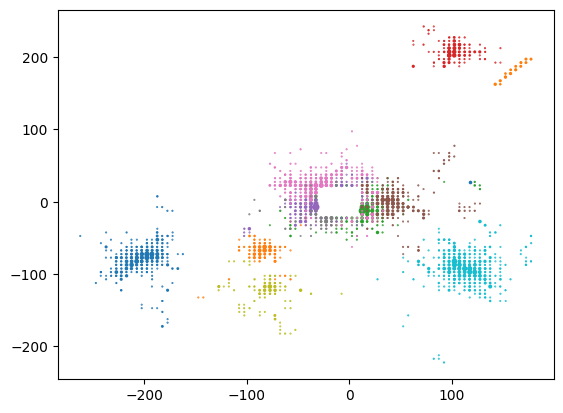

In [6]:
for i, particle in enumerate(event['clusterID'].unique()):
    particle_df = event[event['clusterID'] == particle]
    plt.scatter(particle_df['posx'], particle_df['posy'], label=f'Particle {i}', s=particle_df['E']**(1/2)*5)

## 3. Initial DBSCAN Exploration

We saw in the EDA notebook, that in 2D, there are some clear clusters. Let's see if DBSCAN can find them.

In [6]:
event

,event,hit_number,N,E,T,ix,iy,iz,posx,posy,posz,clusterID,Efrac,uniqueID
0,27000,0,1895,0.261049,17.51,82,60,0,117.543274,27.425,365.28000,11509158343811193875,1.0,-6937585729898357741
1,27000,1,1895,1.218229,12.57,38,42,0,-82.629840,-62.575,363.28000,17828652613631594586,1.0,-618091460077957030
2,27000,2,1895,0.983161,12.61,38,43,0,-82.629840,-67.425,365.28000,17828652613631594586,1.0,5343361554445887269
3,27000,3,1895,0.404564,12.57,45,42,0,-77.370160,-62.575,361.28000,17828652613631594586,1.0,-7175626205880516806
4,27000,4,1895,0.393017,13.46,39,43,1,-87.543280,-67.425,383.28000,17828652613631594586,1.0,-3965530794151426912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,27000,1890,1895,0.001650,29.24,65,54,1,22.629840,-2.575,375.28000,12544480375981618535,1.0,-1052490910097309665
1891,27000,1891,1895,0.001650,21.49,63,64,0,12.629840,47.425,363.28000,12544480375981618535,1.0,8795265319944163564
1892,27000,1892,1895,0.001650,76.07,57,51,6,-17.370160,-27.425,471.27997,12544480375981618535,1.0,-5858943092489343794
1893,27000,1893,1895,0.001650,41.33,53,62,2,-37.370160,37.425,409.28000,12544480375981618535,1.0,-2881660248844868567


In [20]:
dbscan = DBSCAN(eps=30, min_samples=1)
labels = dbscan.fit_predict(event[['posx', 'posy']])

In [21]:
np.unique(labels)

array([0, 1, 2, 3, 4])

In [22]:
homogeneity, completeness, vscore = weighted_v_score(labels_true=event['clusterID'], labels_pred=labels, labels_weight=event['E'])
print(f"Homogeneity: {homogeneity} \nCompleteness: {completeness} \nV-Score: {vscore}")

Homogeneity: 0.2781951886508424 
Completeness: 0.998583386850256 
V-Score: 0.4351593910155882


## 4. Optimize DBSCAN

Let's scan across a range of eps and min_samples values to find the best DBSCAN clustering.

In [40]:
best_score = 0
best_eps = 0
best_min_samples = 0
best_labels = None
for eps in range(1, 40):
    for min_samples in range(1, 5):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(event[['posx', 'posy']])
        homogeneity, completeness, vscore = weighted_v_score(labels_true=event['clusterID'], labels_pred=labels, labels_weight=event['E'])
        if vscore > best_score:
            best_score = vscore
            best_eps = eps
            best_min_samples = min_samples
            best_labels = labels
            print(f"Best V-Score: {best_score} \nBest eps: {best_eps} \nBest min_samples: {best_min_samples}")

Best V-Score: 0.5840052020463562 
Best eps: 1 
Best min_samples: 1
Best V-Score: 0.6921833131231223 
Best eps: 5 
Best min_samples: 1
Best V-Score: 0.7240823442329039 
Best eps: 6 
Best min_samples: 1
Best V-Score: 0.7252040254126332 
Best eps: 7 
Best min_samples: 1
Best V-Score: 0.7301829626039441 
Best eps: 8 
Best min_samples: 1
Best V-Score: 0.7303141671123154 
Best eps: 10 
Best min_samples: 1
Best V-Score: 0.7307977607790653 
Best eps: 11 
Best min_samples: 1
Best V-Score: 0.7324514269150434 
Best eps: 12 
Best min_samples: 1


In [44]:
np.unique(best_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38])

So we have a best V-score of 0.73 at an eps=12, min_samples=1. Let's see what that looks like.

/tmp/ipykernel_1877156/1688689302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event['labels'] = best_labels


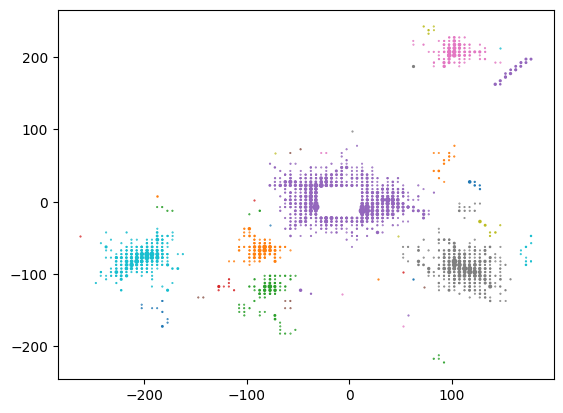

In [59]:
event['labels'] = best_labels
# Plot clusters with label colors
for i, label in enumerate(np.unique(best_labels)):
    plt.scatter(event[event['labels'] == label]['posx'], event[event['labels'] == label]['posy'],  label=f'Cluster {i}', s=event[event['labels'] == label]['E']**(1/2)*5)

## 4. Explore Energy-weighted DBSCAN

In [62]:
best_score = 0
best_eps = 0
best_min_samples = 0
best_labels = None
for eps in range(1, 40):
    for min_samples in range(1, 10):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(event[['posx', 'posy']], sample_weight=event['E'])
        homogeneity, completeness, vscore = weighted_v_score(labels_true=event['clusterID'], labels_pred=labels, labels_weight=event['E'])
        if vscore > best_score:
            best_score = vscore
            best_eps = eps
            best_min_samples = min_samples
            best_labels = labels
            print(f"Best V-Score: {best_score} \nBest eps: {best_eps} \nBest min_samples: {best_min_samples}")

Best V-Score: 0.4996546459656723 
Best eps: 1 
Best min_samples: 1
Best V-Score: 0.6589145663197926 
Best eps: 5 
Best min_samples: 1
Best V-Score: 0.7524823733986102 
Best eps: 6 
Best min_samples: 1
Best V-Score: 0.762408890419704 
Best eps: 7 
Best min_samples: 1
Best V-Score: 0.7714197568132614 
Best eps: 8 
Best min_samples: 1
Best V-Score: 0.7762954968164965 
Best eps: 10 
Best min_samples: 1
Best V-Score: 0.7843550856385034 
Best eps: 11 
Best min_samples: 2
Best V-Score: 0.8004256121002749 
Best eps: 12 
Best min_samples: 2
Best V-Score: 0.811513399200797 
Best eps: 15 
Best min_samples: 2
Best V-Score: 0.8160218673448564 
Best eps: 18 
Best min_samples: 4
Best V-Score: 0.8163573580453676 
Best eps: 18 
Best min_samples: 5


/tmp/ipykernel_1877156/1688689302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event['labels'] = best_labels


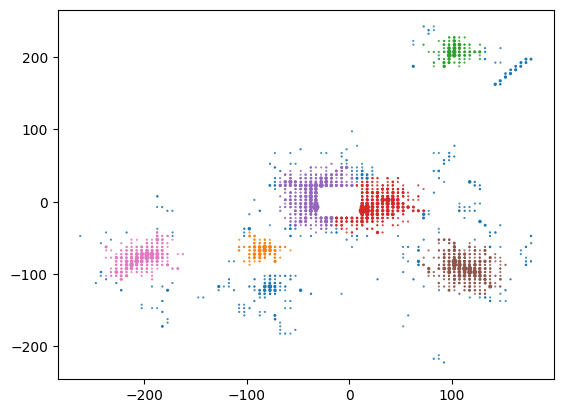

In [63]:
event['labels'] = best_labels
# Plot clusters with label colors
for i, label in enumerate(np.unique(best_labels)):
    plt.scatter(event[event['labels'] == label]['posx'], event[event['labels'] == label]['posy'],  label=f'Cluster {i}', s=event[event['labels'] == label]['E']**(1/2)*5)

We see that the large central cluster, which the vanilla DBSCAN failed to split, has now been handled much better.

## 5. 3D Energy-weighted DBSCAN

This works really nicely in 2D. Recall that the 3D image is less clear - can DBSCAN make sense of it?

In [64]:
best_score = 0
best_eps = 0
best_min_samples = 0
best_labels = None
for eps in range(1, 40):
    for min_samples in range(1, 10):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(event[['posx', 'posy', 'posz']], sample_weight=event['E'])
        homogeneity, completeness, vscore = weighted_v_score(labels_true=event['clusterID'], labels_pred=labels, labels_weight=event['E'])
        if vscore > best_score:
            best_score = vscore
            best_eps = eps
            best_min_samples = min_samples
            best_labels = labels
            print(f"Best V-Score: {best_score} \nBest eps: {best_eps} \nBest min_samples: {best_min_samples}")

Best V-Score: 0.42026814804759416 
Best eps: 1 
Best min_samples: 1
Best V-Score: 0.4246444088214579 
Best eps: 2 
Best min_samples: 1
Best V-Score: 0.42768589935103146 
Best eps: 4 
Best min_samples: 1
Best V-Score: 0.46392543068483527 
Best eps: 5 
Best min_samples: 1
Best V-Score: 0.5459947735991724 
Best eps: 6 
Best min_samples: 1
Best V-Score: 0.6003313574800141 
Best eps: 7 
Best min_samples: 1
Best V-Score: 0.6801025224205562 
Best eps: 8 
Best min_samples: 1
Best V-Score: 0.6974173934720512 
Best eps: 9 
Best min_samples: 1
Best V-Score: 0.7530856500355941 
Best eps: 10 
Best min_samples: 1
Best V-Score: 0.7648164271744547 
Best eps: 11 
Best min_samples: 1
Best V-Score: 0.7673073509548114 
Best eps: 13 
Best min_samples: 1
Best V-Score: 0.7946821183099301 
Best eps: 13 
Best min_samples: 2
Best V-Score: 0.8050939722189437 
Best eps: 14 
Best min_samples: 2
Best V-Score: 0.8132636378226669 
Best eps: 17 
Best min_samples: 1
Best V-Score: 0.8191093825034189 
Best eps: 18 
Best 

/tmp/ipykernel_1877156/1688689302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event['labels'] = best_labels


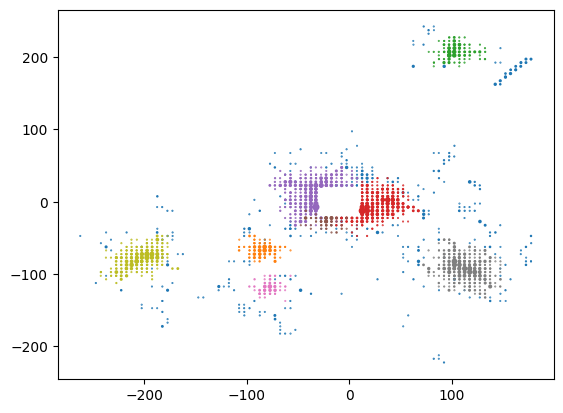

In [65]:
event['labels'] = best_labels
# Plot clusters with label colors
for i, label in enumerate(np.unique(best_labels)):
    plt.scatter(event[event['labels'] == label]['posx'], event[event['labels'] == label]['posy'],  label=f'Cluster {i}', s=event[event['labels'] == label]['E']**(1/2)*5)

3D DBSCAN **slightly** beats out 2D DBSCAN. This is an encouraging sign that if we can figure out how to handle the extra features (z, E, T) correctly, we should be able to out-do the 2D clustering.

## 6. 4D DBSCAN

Why not?

In [68]:
best_score = 0
best_eps = 0
best_min_samples = 0
best_labels = None
for eps in range(1, 40):
    for min_samples in range(1, 10):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(event[['posx', 'posy', 'posz', 'T']], sample_weight=event['E'])
        homogeneity, completeness, vscore = weighted_v_score(labels_true=event['clusterID'], labels_pred=labels, labels_weight=event['E'])
        if vscore > best_score:
            best_score = vscore
            best_eps = eps
            best_min_samples = min_samples
            best_labels = labels
            print(f"Best V-Score: {best_score} \nBest eps: {best_eps} \nBest min_samples: {best_min_samples}")

Best V-Score: 0.42026814804759416 
Best eps: 1 
Best min_samples: 1
Best V-Score: 0.4239426983270138 
Best eps: 3 
Best min_samples: 1
Best V-Score: 0.459720279579115 
Best eps: 5 
Best min_samples: 1
Best V-Score: 0.5332050367927706 
Best eps: 6 
Best min_samples: 1
Best V-Score: 0.5957537762428592 
Best eps: 7 
Best min_samples: 1
Best V-Score: 0.6657937712235181 
Best eps: 8 
Best min_samples: 1
Best V-Score: 0.6903133956911144 
Best eps: 9 
Best min_samples: 1
Best V-Score: 0.7404138998013252 
Best eps: 10 
Best min_samples: 1
Best V-Score: 0.7547196870627454 
Best eps: 11 
Best min_samples: 1
Best V-Score: 0.7583255364178494 
Best eps: 12 
Best min_samples: 1
Best V-Score: 0.7848018450146412 
Best eps: 13 
Best min_samples: 1
Best V-Score: 0.7935756936260224 
Best eps: 14 
Best min_samples: 1
Best V-Score: 0.7972581352611349 
Best eps: 18 
Best min_samples: 1
Best V-Score: 0.8008145457130863 
Best eps: 20 
Best min_samples: 1


Interestingly, time just confuses this issue, when using an unsupervised clustering algorithm. Hopefully we can use it somehow with a supervised method...